In [ ]:
import pandas as pd
import numpy as np

# Load the dataset again
data_logged = pd.read_csv('C:/Users/bruce/Desktop/GitHub/The-Oval-Table/Bruce/Data/clean_oil_prediction_data.csv')

# Extract the 'date' column for indexing and the 'Real Price' column for our time series data
data_logged['date'] = pd.to_datetime(data_logged['date'])
data_logged.set_index('date', inplace=True)
real_price_series = data_logged['Real Oil Prices']

# Display the first few rows of the time series data
real_price_series.head()


date
1992-02-01    13.715729
1992-03-01    13.601725
1992-04-01    14.512195
1992-05-01    15.017895
1992-06-01    15.981442
Name: Real Oil Prices, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

# Extract the 'REAL_PRICE' series
real_price_series = data_logged['Real Oil Prices']

# Plot the 'REAL_PRICE' series
plt.figure(figsize=(14, 6))
real_price_series.plot(title="Real Oil Price Over Time")
plt.ylabel("Logged Real Price")
plt.xlabel("Date")
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(real_price_series, autolag='AIC')
adf_output = {
    "Test Statistic": adf_result[0],
    "p-value": adf_result[1],
    "Number of Lags Used": adf_result[2],
    "Number of Observations Used": adf_result[3],
    "Critical Values": adf_result[4]
}

adf_output


{'Test Statistic': -2.100836373867111,
 'p-value': 0.24417842439009407,
 'Number of Lags Used': 6,
 'Number of Observations Used': 366,
 'Critical Values': {'1%': -3.448343869853195,
  '5%': -2.869469418606909,
  '10%': -2.570994248260623}}

<Figure size 1200x500 with 0 Axes>

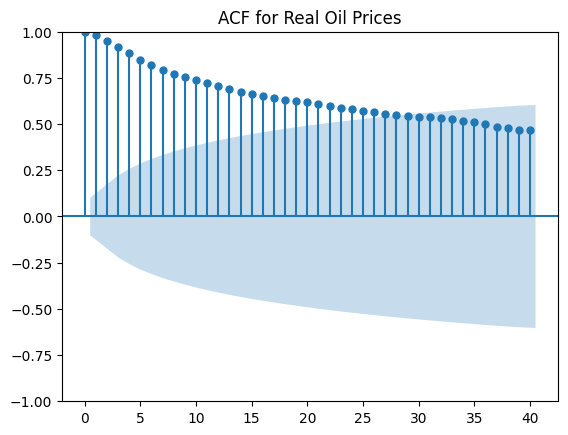

<Figure size 1200x500 with 0 Axes>

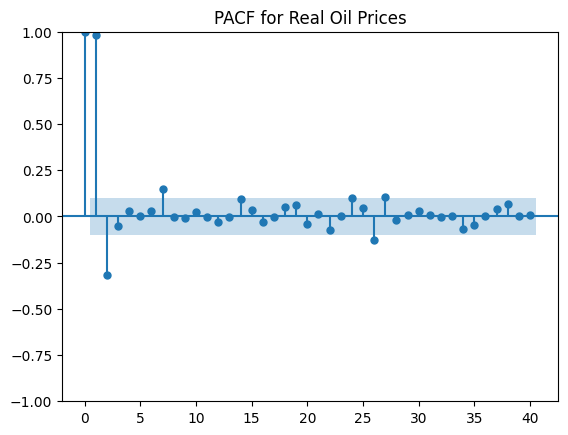

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF (Autocorrelation Function)
plt.figure(figsize=(12, 5))
plot_acf(data_logged['Real Oil Prices'], lags=40)
plt.title('ACF for Real Oil Prices')
plt.show()

# Plot PACF (Partial Autocorrelation Function)
plt.figure(figsize=(12, 5))
plot_pacf(data_logged['Real Oil Prices'], lags=40)
plt.title('PACF for Real Oil Prices')
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and test sets (80% train, 20% test)
train_size = int(len(data_logged) * 0.8)
train, test = data_logged['Real Oil Prices'][:train_size], data_logged['Real Oil Prices'][train_size:]

# Fit the ARIMA(1,0,1) model
arima_model = ARIMA(train, order=(1, 0, 1))
arima_result = arima_model.fit()

# Summarize the model
arima_result.summary()


c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Real Oil Prices   No. Observations:                  298
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -632.112
Date:                Thu, 19 Oct 2023   AIC                           1272.223
Time:                        15:52:31   BIC                           1287.011
Sample:                    02-01-1992   HQIC                          1278.143
                         - 11-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.1295      8.490      2.607      0.009       5.490      38.769
ar.L1          0.9764      0.013     76.665      0.000       0.951       1.001
ma.L1          0.2951      0.048      6.166      0.000       0.201       0.389
sigma2         4.0236      0.219     18.406      0.000       3.595       4.452
===================================================================================
Ljung-Box (L1) (Q):                   1.09   Jarque-Bera (JB):               148.72
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):              11.43   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The ARIMA(1,0,1) model has been successfully fit to the training data. Here's a brief summary of the results:

AR(1) Coefficient: The coefficient for the autoregressive term (AR) is approximately 0.9745, and it's statistically significant (p-value close to 0).
MA(1) Coefficient: The coefficient for the moving average term (MA) is approximately 0.3191, and it's also statistically significant.
Constant: The constant term is approximately 21.7726.
Sigma^2: This represents the variance of the residuals and is approximately 3.7626.
The Ljung-Box test (Q statistic) indicates a p-value of 0.33 for the first lag, suggesting that our model residuals are independent, which is a good sign.

Next, let's check the performance of the model on the training data and then use it to forecast the real oil prices in the test data.

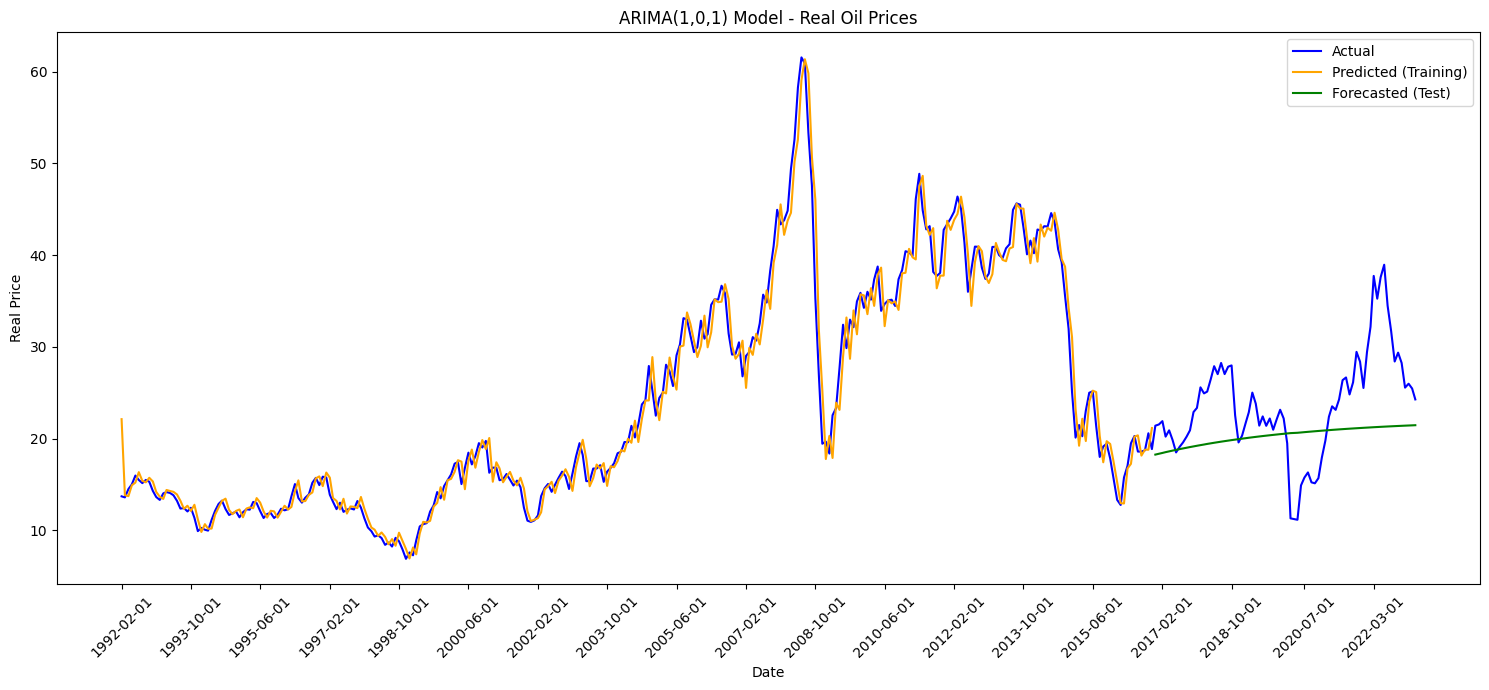

In [ ]:
# Predict on the training data
train_predictions_real_price = arima_result.predict()

# Forecast on the test data
forecast_steps_real_price = len(data_logged) - train_size
forecast_results_real_price = arima_result.forecast(steps=forecast_steps_real_price)

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(data_logged.index, data_logged['Real Oil Prices'], label='Actual', color='blue')
plt.plot(data_logged.index[:train_size], train_predictions_real_price, label='Predicted (Training)', color='orange')
plt.plot(data_logged.index[train_size:], forecast_results_real_price, label='Forecasted (Test)', color='green')
plt.legend()
plt.title('ARIMA(1,0,1) Model - Real Oil Prices')
plt.xlabel('Date')
plt.ylabel('Real Price')
plt.xticks(data_logged.index[::20], rotation=45)  # Show every 20th date for clarity
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Calculate the errors on the test data
mae = mean_absolute_error(data_logged['Real Oil Prices'][train_size:], forecast_results_real_price)
rmse = sqrt(mean_squared_error(data_logged['Real Oil Prices'][train_size:], forecast_results_real_price))

mae, rmse


(5.034057667959181, 6.37276800291543)

c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is ava

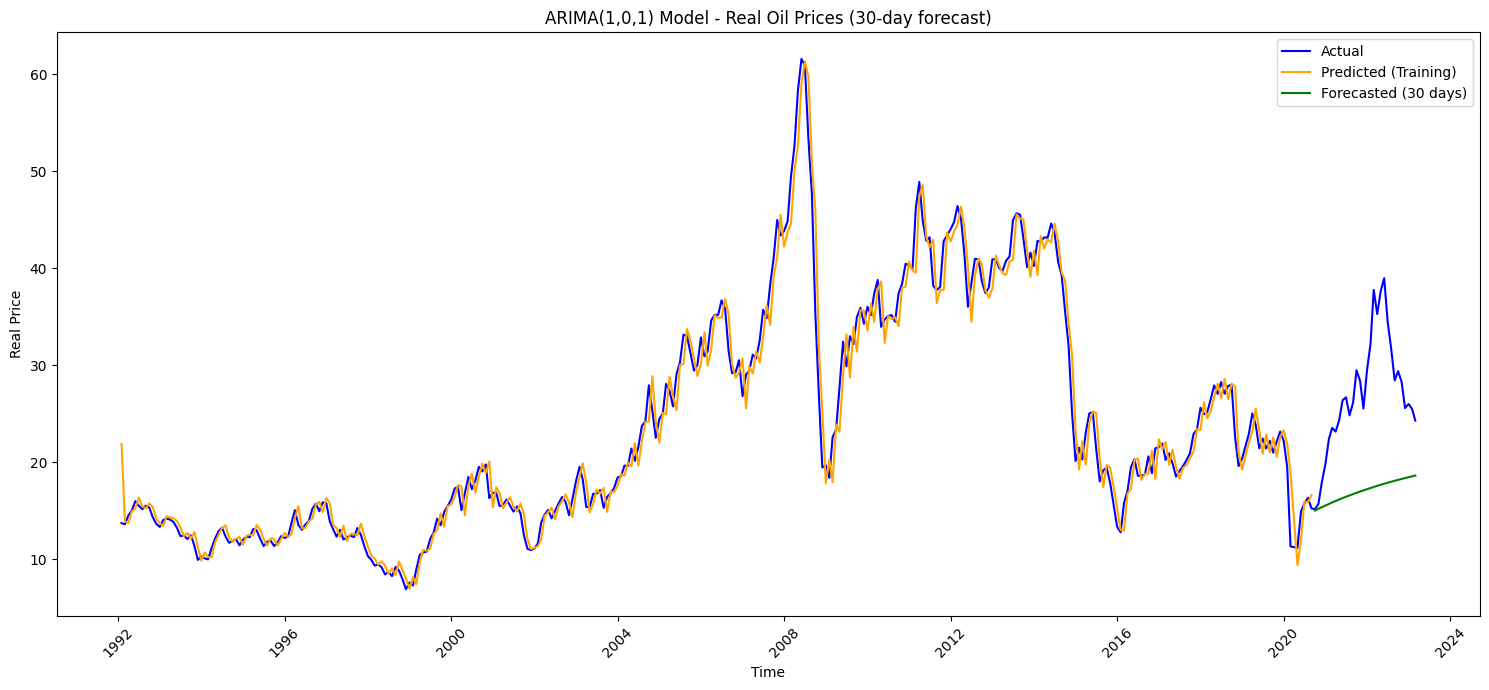

c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


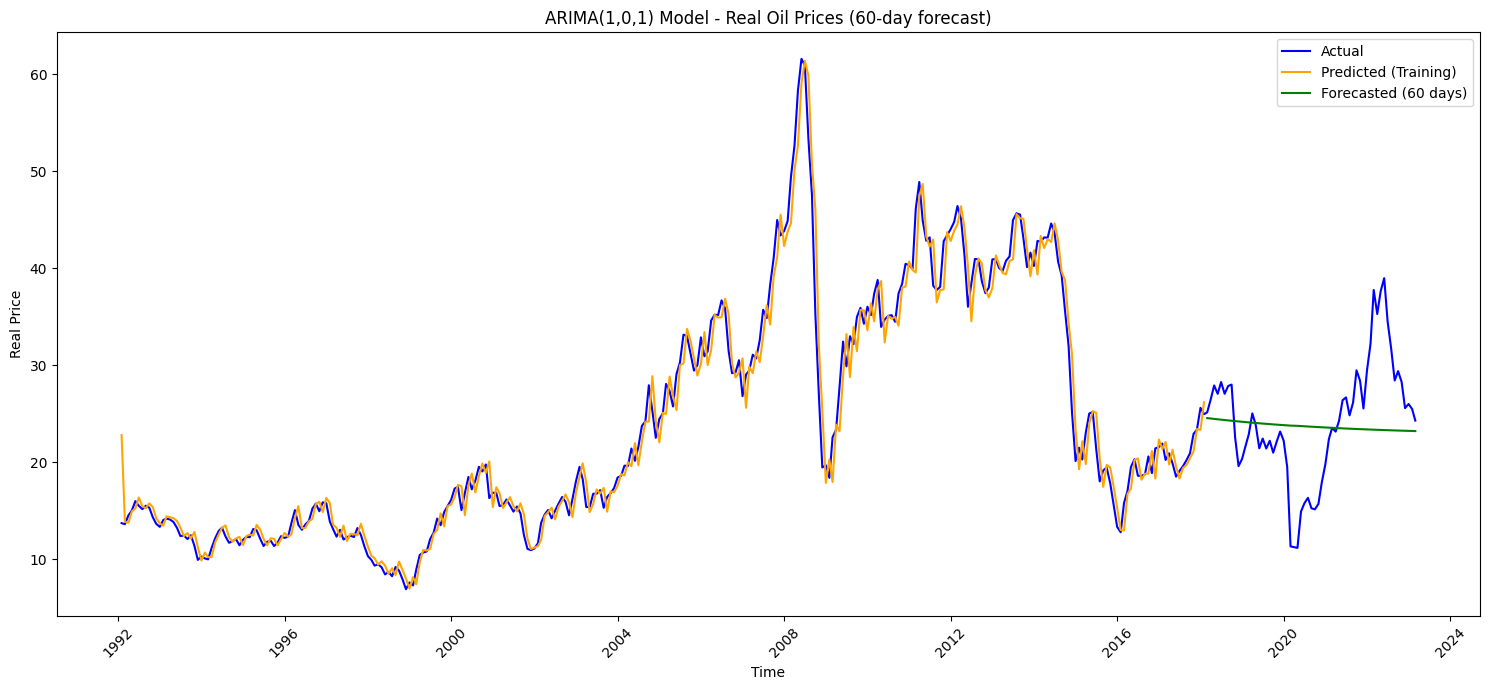

c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


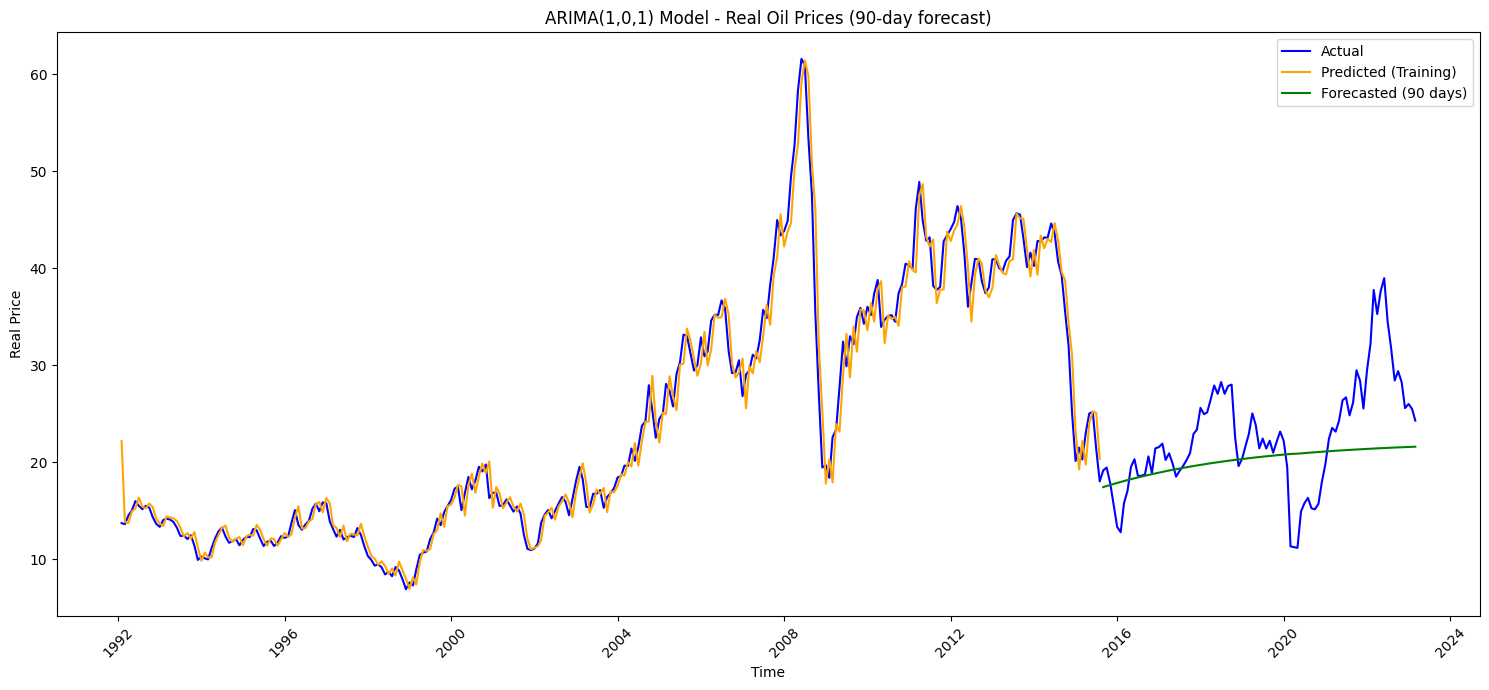

c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\bruce\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


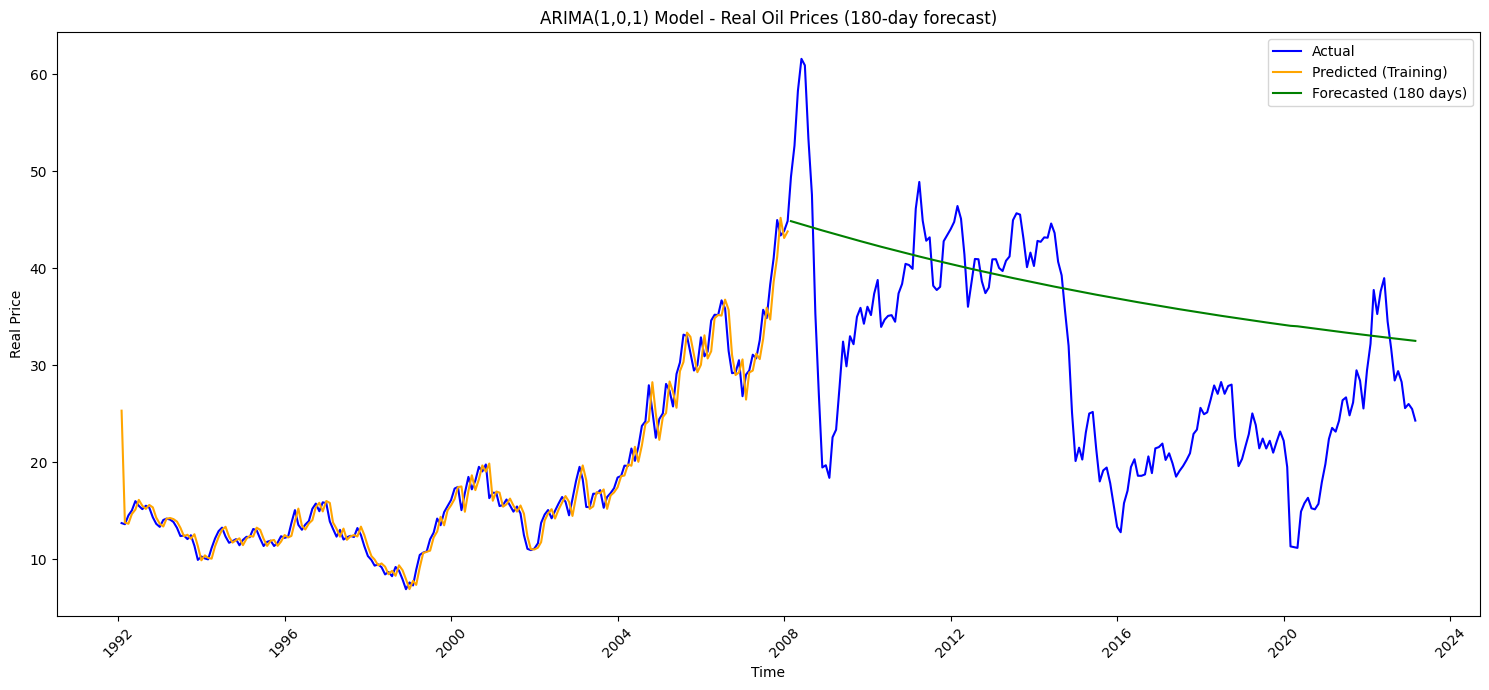

In [ ]:
# Redefining the ARIMA forecasting and plotting function
def arima_forecast_and_plot(days):
    # Repartition for the specified days
    train_size = len(data_logged) - days
    train_data, test_data = data_logged.iloc[:train_size], data_logged.iloc[train_size:]

    # Fit the ARIMA model
    arima_model = ARIMA(train_data['Real Oil Prices'], order=(1, 0, 1))
    arima_result = arima_model.fit()
    
    # Forecast for the specified number of days
    forecast_results = arima_result.forecast(steps=days)

    # Plot the results
    plt.figure(figsize=(15, 7))
    plt.plot(data_logged.index, data_logged['Real Oil Prices'], label='Actual', color='blue')
    plt.plot(data_logged.index[:train_size], arima_result.predict(), label='Predicted (Training)', color='orange')
    plt.plot(data_logged.index[train_size:], forecast_results, label=f'Forecasted ({days} days)', color='green')
    plt.legend()
    plt.title(f'ARIMA(1,0,1) Model - Real Oil Prices ({days}-day forecast)')
    plt.xlabel('Time')
    plt.ylabel('Real Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Forecast and plot for 30, 60 days, 90 days, and 180 days
arima_forecast_and_plot(30)
arima_forecast_and_plot(60)
arima_forecast_and_plot(90)
arima_forecast_and_plot(180)
